In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
print("X train shape = " , X_train.shape)
print("X test shape = " , X_test.shape)
print("y train shape = " , y_train.shape)
print("y test shape = " , y_test.shape)

X train shape =  (60000, 28, 28)
X test shape =  (10000, 28, 28)
y train shape =  (60000,)
y test shape =  (10000,)


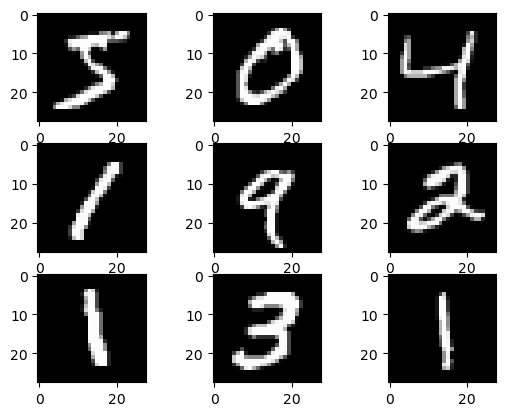

In [4]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28*28*1))
X_test = X_test.reshape((X_test.shape[0], 28*28*1))

In [6]:
# one hot encode target values
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
model = Sequential()
model.add(Input(shape = (784, ) ))
model.add(Dense(700, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 700)               549500    
                                                                 
 dense_1 (Dense)             (None, 500)               350500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 905,010
Trainable params: 905,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ["accuracy"])

In [12]:
history = model.fit(X_train , y_train , batch_size = 64 ,
                    epochs = 20, verbose = 1, validation_data = (X_test , y_test))

Epoch 1/20
938/938 [==============================] - 9s 9ms/step - loss: 0.1877 - accuracy: 0.9432 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 2/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0760 - accuracy: 0.9765 - val_loss: 0.0702 - val_accuracy: 0.9773
Epoch 3/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0511 - accuracy: 0.9832 - val_loss: 0.0704 - val_accuracy: 0.9774
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0738 - val_accuracy: 0.9784
Epoch 5/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0673 - val_accuracy: 0.9807
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0907 - val_accuracy: 0.9776
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0767 - val_accuracy: 0.9797
Epoch 

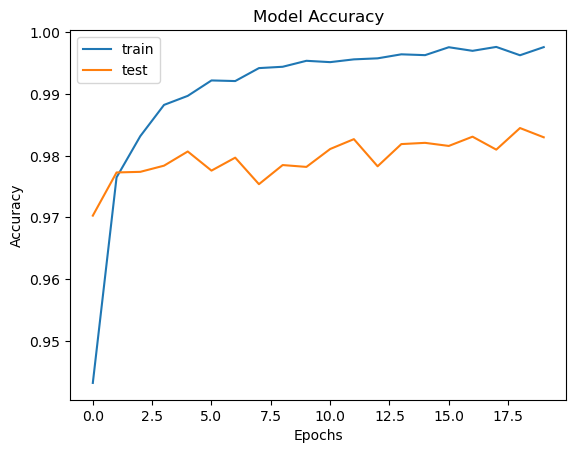

In [13]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

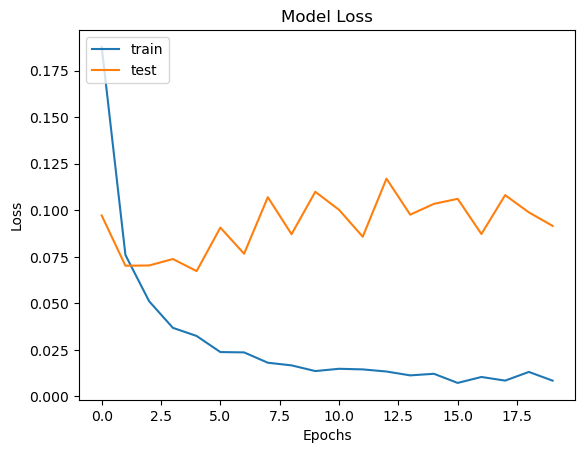

In [14]:
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('./MNIST_MLP.h5')